In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split

In [26]:
data = np.load('mnist_train_small.npy')

In [27]:
X = data[:,1:]
y = data[:,0]

In [28]:
X.shape,y.shape

((19999, 784), (19999,))

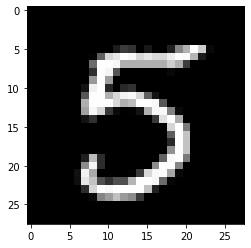

In [29]:
plt.imshow(X[0].reshape(28,28),cmap='gray')

In [30]:
y[0]

5

In [31]:
# X, y = make_blobs(n_samples=100,centers=3,random_state=42)
# plt.scatter(X[:,0],X[:,1],c=y)

### KNN

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# making object
model = KNeighborsClassifier()

In [37]:
# training the model happens in fit functiion
# here it is basically just plotting the points on the graph
# no work is happening in training knn model
model.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [39]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

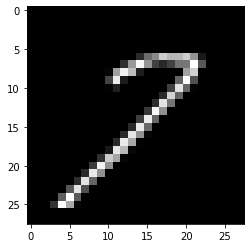

In [40]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

In [41]:
model.score(X_test[:100],y_test[:100])

0.95

## Custom KNN - Our own KNN implementation from scratch!

In [42]:

class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [43]:
m2 = CustomKNN()

In [44]:
m2.fit(X_train, y_train)

In [45]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [46]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [47]:
m2.score(X_test[:100], y_test[:100])

0.95

## Demo of functions used

In [48]:

li = [ 
    [23, 0],
    [45, 1],
    [19, 0],
    [3, 2],
    [10, 0],
    [34, 2],
    [100, 1]
]

In [49]:
sorted_li = sorted(li)

In [50]:
top_k = sorted_li[:5]

In [51]:
top_k

[[3, 2], [10, 0], [19, 0], [23, 0], [34, 2]]

In [52]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)

In [53]:
li, counts

(array([0, 2]), array([3, 2], dtype=int64))

In [54]:

counts

array([3, 2], dtype=int64)